<a href="https://colab.research.google.com/github/CDAC-lab/BUS5001-Resources/blob/main/Notebooks/TextAnalysis/Workshop_Visualise_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentence Embedding and Visualisation Notebook
This notebook demonstrates how to embed sentences using Google's `text-embedding-004` model and then visualize their semantic relationships in 2D space using t-SNE.

### 1. Setup and Configuration
Install the necessary libraries and configure the Gemini API.

**Important:** Replace `'YOUR_API_KEY'` with your actual Gemini API key from [Google AI Studio](https://makersuite.google.com/).

To run the following cell, your API key must be stored it in a Colab Secret named GOOGLE_API_KEY. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](https://aistudio.google.com) for an example.

In [11]:
!pip install -q google-genai numpy scikit-learn matplotlib

In [12]:
import os

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from google.colab import userdata
from google import genai

In [14]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
client = genai.Client(api_key=GOOGLE_API_KEY)

### 2. Core Functions
Functions to generate embeddings and plot using t-SNE.

In [35]:
def get_sentence_embeddings(sentences, model_name="models/text-embedding-004", task_type="SEMANTIC_SIMILARITY"):
    embeddings = []
    for text in sentences:
        result = client.models.embed_content(model=model_name, contents=text)
        embeddings.append(result.embeddings[0].values)
    return np.array(embeddings)

In [37]:
def plot_embeddings_2d(embeddings, labels):
    tsne = TSNE(n_components=2, random_state=42, perplexity=2)
    reduced = tsne.fit_transform(embeddings)
    plt.figure(figsize=(10, 7))
    for i, label in enumerate(labels):
        x, y = reduced[i]
        plt.scatter(x, y)
        plt.text(x + 0.1, y, label, fontsize=9)
    plt.title("Sentence Embeddings with t-SNE")
    plt.grid(True)
    plt.show()

### 3. Run the Embedding + Visualization

In [36]:
sentences = [
    "The cat sat on the mat.",
    "Dogs are loyal and friendly.",
    "There are many breeds of dogs around the world.",
    "Cats purr when they are content.",

    "Artificial Intelligence is changing the future of medicine.",
    "Machine learning helps computers identify patterns in data.",
    "AI systems are now writing news articles and composing music.",

    "I enjoy hiking in the mountains on cool mornings.",
    "She loves camping under the stars in national parks.",
    "Nature walks help me clear my mind and feel refreshed.",

    "He felt like the king of the world at the finish line.",
    "She ruled the dance floor like a queen.",
    "Winning that award made him feel invincible.",

    "Climate change is a threat to global ecosystems.",
    "Online education has made learning accessible to all."
]

AttributeError: 'numpy.ndarray' object has no attribute 'embedding'

In [39]:
embeddings = get_sentence_embeddings(sentences)

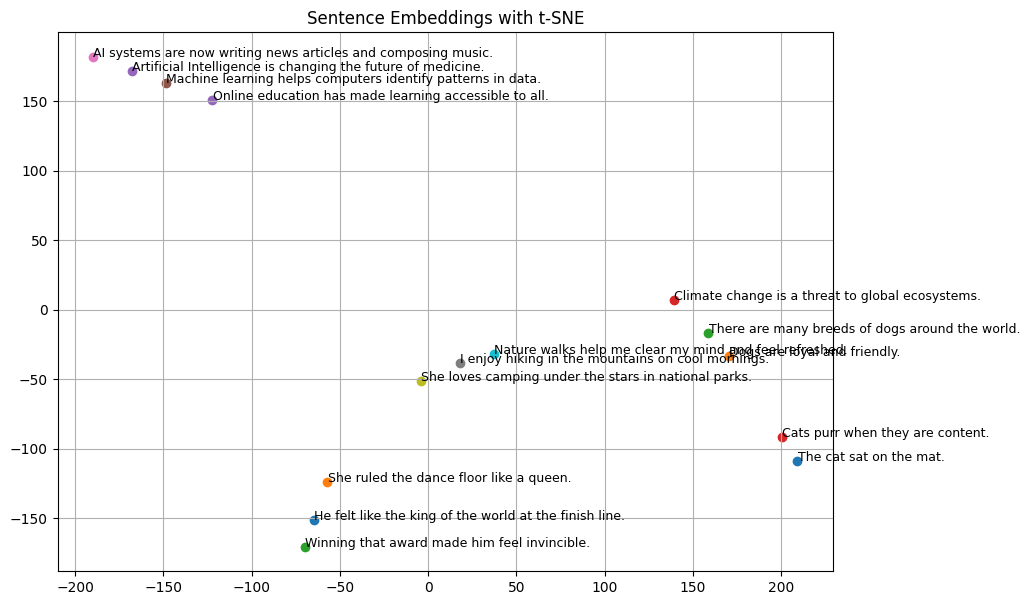

In [40]:
plot_embeddings_2d(embeddings, sentences)